In [1]:
# warning 무시
import logging, os
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

np.random.seed(123)
tf.random.set_seed(123)

In [2]:
# mnist data를 담을 그릇 생성
mnist = tf.keras.datasets.mnist

# mnist data load
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# train, test data split
train_images, train_labels = train_images[:5000], train_labels[:5000]
test_images, test_labels = test_images[:1000], test_labels[:1000]

print("Original Train Image data shape: ",train_images.shape)
print("Original Test Image data shape: ",test_images.shape)
print("Original Train Label data: ",train_labels)

Original Train Image data shape:  (5000, 28, 28)
Original Test Image data shape:  (1000, 28, 28)
Original Train Label data:  [5 0 4 ... 2 1 2]


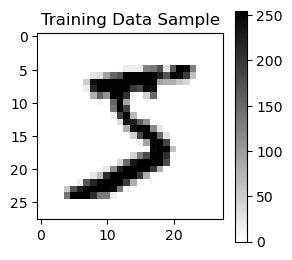

In [4]:
plt.figure(figsize=(3,3))
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.title("Training Data Sample")
plt.savefig("sample1.png")

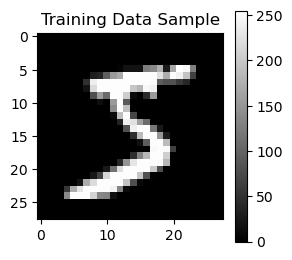

In [5]:
plt.figure(figsize=(3,3))
plt.imshow(train_images[0], cmap=plt.cm.gray)
plt.colorbar()
plt.title("Training Data Sample")
plt.savefig("sample2.png")

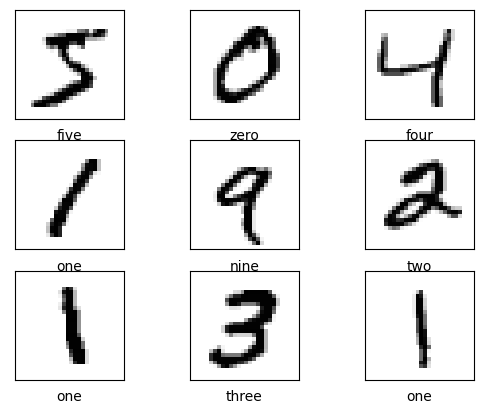

In [6]:
# Class name 정의
class_name = ['zero', 'one', 'two', 'three', 'four',
              'five', 'six', 'seven', 'eight', 'nine']

# 9개의 학습 data를 출력
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_name[train_labels[i]])
plt.savefig("sample3.png")

In [7]:
# CNN Model의 입력으로 사용하기 위해 (Data 수, 가로 Pixel, 세로 Pixel, 1)의 형태로 변환
train_images = tf.expand_dims(train_images, -1)
test_images = tf.expand_dims(test_images, -1)

print("Expended Train Image data shape: ",train_images.shape)
print("Expended Test Image data shape: ",test_images.shape)

Expended Train Image data shape:  (5000, 28, 28, 1)
Expended Test Image data shape:  (1000, 28, 28, 1)


In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='SAME', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(padding='SAME'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='SAME'),
    tf.keras.layers.MaxPool2D(padding='SAME'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='SAME'),
    tf.keras.layers.MaxPool2D(padding='SAME'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 32)         0

In [10]:
# CNN 모델의 학습 방법 설정
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# 학습 진행
history = model.fit(train_images, train_labels, epochs=20, batch_size=512)

Epoch 1/20
10/10 [==============================] - 2s 125ms/step - loss: 11.6434 - accuracy: 0.1918
Epoch 2/20
10/10 [==============================] - 1s 124ms/step - loss: 2.8048 - accuracy: 0.4946
Epoch 3/20
10/10 [==============================] - 1s 124ms/step - loss: 1.1314 - accuracy: 0.6824
Epoch 4/20
10/10 [==============================] - 1s 126ms/step - loss: 0.7214 - accuracy: 0.7810
Epoch 5/20
10/10 [==============================] - 1s 123ms/step - loss: 0.5191 - accuracy: 0.8432
Epoch 6/20
10/10 [==============================] - 1s 124ms/step - loss: 0.4141 - accuracy: 0.8776
Epoch 7/20
10/10 [==============================] - 1s 123ms/step - loss: 0.3474 - accuracy: 0.8986
Epoch 8/20
10/10 [==============================] - 1s 122ms/step - loss: 0.2961 - accuracy: 0.9160
Epoch 9/20
10/10 [==============================] - 1s 123ms/step - loss: 0.2559 - accuracy: 0.9282
Epoch 10/20
10/10 [==============================] - 1s 123ms/step - loss: 0.2210 - accuracy: 0.936

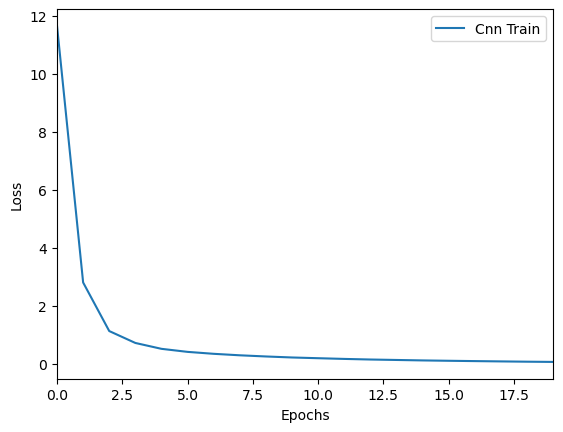

In [16]:
# Loss graph를 위한 함수 정의
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

def Visualize(histories, key='loss'):
    for name, history in histories:
        plt.plot(history.epoch, history.history[key],
                label=name.title()+' Train')
        
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()
    plt.xlim([0, max(history.epoch)])
    plt.savefig("plot.png")
    
Visualize([('CNN', history)], 'loss')

In [18]:
# 모델 평가
loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

32/32 - 0s - loss: 0.2494 - accuracy: 0.9240 - 212ms/epoch - 7ms/step


In [21]:
# 평가용 Data에 대한 예측 결과를 저장
y_prob = model.predict(test_images)
predicted = y_prob.argmax(axis=-1)

In [22]:
# 평가 및 예측결과 출력
print('\nTest Loss: {:.4f} | Test Accuracy: {}'.format(loss, test_acc))
print('Predicted Test Data Class: ',predicted[:10])


Test Loss: 0.2494 | Test Accuracy: 0.9240000247955322
Predicted Test Data Class:  [7 2 1 0 4 1 4 9 5 9]


In [17]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

import tensorflow as tf
from tensorflow.keras import models
import matplotlib.pyplot as plt
 
def Plotter(test_images, model):
 
   img_tensor = test_images[0]
   img_tensor = np.expand_dims(img_tensor, axis=0)
  
   layer_outputs = [layer.output for layer in model.layers[:6]]
   activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
 
   activations = activation_model.predict(img_tensor)
  
   layer_names = []
   for layer in model.layers[:6]:
       layer_names.append(layer.name)
  
   images_per_row = 16
 
   for layer_name, layer_activation in zip(layer_names, activations):
       n_features = layer_activation.shape[-1]
  
       size = layer_activation.shape[1]
  
       n_cols = n_features // images_per_row
       display_grid = np.zeros((size * n_cols, images_per_row * size))
  
       for col in range(n_cols):
           for row in range(images_per_row):
               channel_image = layer_activation[0, :, :, col * images_per_row + row]
          
               channel_image -= channel_image.mean()
               channel_image /= channel_image.std()
               channel_image *= 64
               channel_image += 128
               channel_image = np.clip(channel_image, 0, 255.).astype('uint8')
          
               display_grid[col * size : (col+1) * size, row * size : (row+1) * size] = channel_image
          
       scale = 1. / size
       plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
       plt.title(layer_name)
       plt.grid(False)
       plt.imshow(display_grid, aspect='auto', cmap='viridis')
       plt.savefig("plot.png")
      
   plt.show()


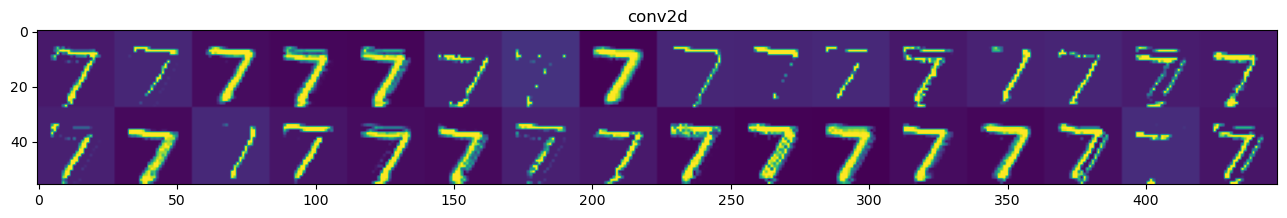

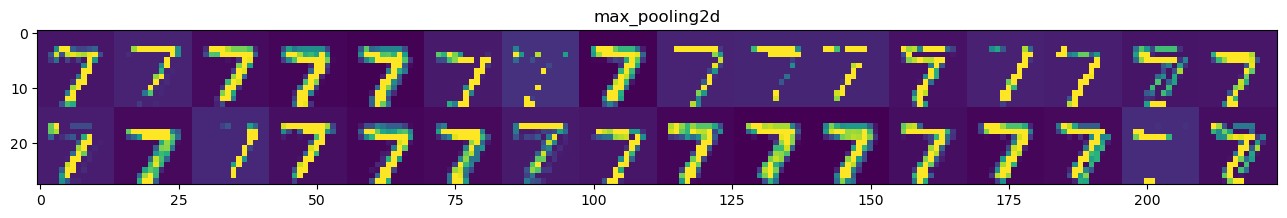

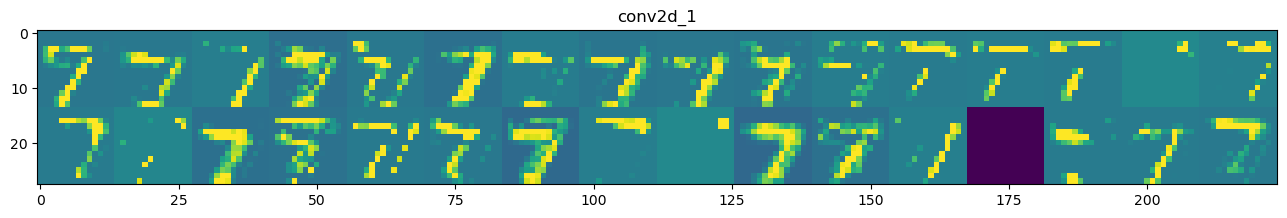

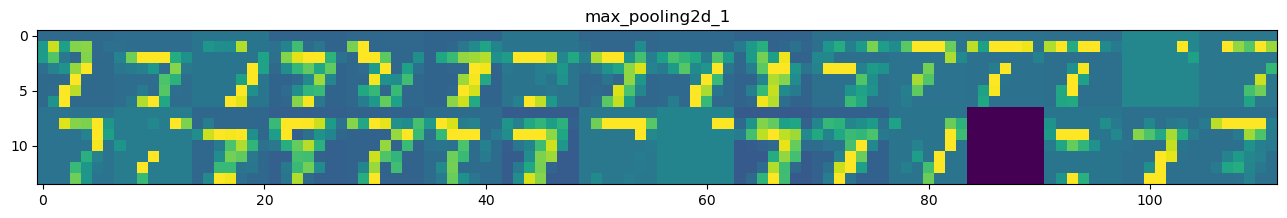

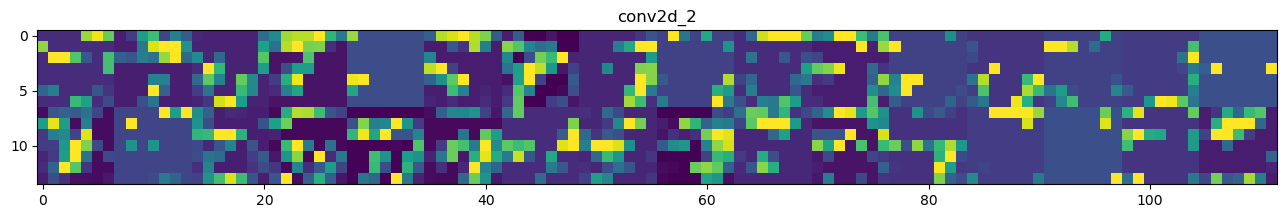

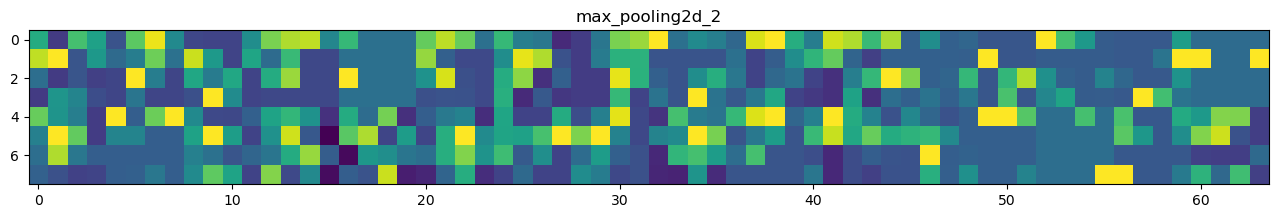

In [23]:
Plotter(test_images, model)